In [84]:
import keras.preprocessing 
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stopw=set(stopwords.words('english'))

In [57]:
## here we use embeding_ind to make a disconary that have k-dimentional vector mapped with the key
embeding_ind={}
with open ('glove6b50d/glove.6B..txt',encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        #coef=np.asarray(values[1:],dt50dype=np.float)
        coef=[ float(values[i]) for i in range(1,51)]
        num=np.asarray(coef)
        embeding_ind[word]=num


In [58]:
df=pd.read_csv('fake-news/train.csv')
test=pd.read_csv('fake-news/test.csv')
for i in range(len(df)):
    df.loc[i,'text']=str(df.loc[i,'text'])[:100]
for i in range(len(test)):
    test.loc[i,'text']=str(test.loc[i,'text'])[:100]


In [59]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [60]:
df['total'] = df['title']+' '+df['author']
test['total']=test['title']+' '+test['author']

df.total.fillna(df.text, inplace=True)   
test.total.fillna(test.text, inplace=True)  
X = df.drop('label',axis=1)
y=df['label']
df = df.fillna('')
test = test.fillna('')
## now i just fill all nan values with the empty string and also i have created a one more column that is total
msg = X.copy()
msg_test = test.copy()
msg.head()

,id,title,author,text,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Iranian woman jailed for fictional unpublished...


In [61]:
msg_test.iloc[6]['total']

'Pelosi Calls for FBI Investigation to Find Out ’What the Russians Have on Donald Trump’ - Breitbart Pam Key'

In [62]:
def make_clear(msg):
    corpus = []
    for i in range(len(msg)):
    
        review = re.sub('[^a-zA-Z]',' ',msg['total'][i])
        review = review.lower()
        review = review.split()   
        review = [ps.stem(word) for word in review if not word in stopw]
        review = ' '.join(review)
    
        corpus.append(review)
    return corpus
corpus=make_clear(msg)
corpus_test = make_clear(msg_test)

In [63]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu',
 'flynn hillari clinton big woman campu breitbart daniel j flynn',
 'truth might get fire consortiumnew com',
 'civilian kill singl us airstrik identifi jessica purkiss',
 'iranian woman jail fiction unpublish stori woman stone death adulteri howard portnoy',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart daniel nussbaum',
 'ever wonder britain icon pop pianist get long flight six pictu',
 'beno hamon win french socialist parti presidenti nomin new york time alissa j rubin',
 'donald j trump schedul make highli anticip visit church detroit saturda',
 'back channel plan ukrain russia courtesi trump associ new york time megan twohey scott shane']

In [64]:
def make_tokenize(x):
    data=[]
    for i in range(len(x)):
        
        t=word_tokenize(x[i])
        data.append(t)
    return data


In [65]:
x=make_tokenize(corpus)
x_test=make_tokenize(corpus_test)
x=np.array(x)
x_test=np.array(x_test)


C:\Users\kip31\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kip31\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [66]:
print(x[:2])

[list(['hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu'])
 list(['flynn', 'hillari', 'clinton', 'big', 'woman', 'campu', 'breitbart', 'daniel', 'j', 'flynn'])]


In [67]:
def embeding_output(x):
    maxlen=50
    embeding_out=np.zeros((x.shape[0],maxlen,50))
    for ix in range(x.shape[0]):
        for j in range(maxlen):
            try:
                embeding_out[ix][j]=embeding_ind[x[ix][j].lower()]
            except:
                embeding_out[ix][j]=np.zeros((50,))
    return embeding_out
x_matrix=embeding_output(x)
x_test_matrix=embeding_output(x_test)

In [68]:
print(x_matrix.shape)

(20800, 50, 50)


In [69]:
y=np.array(y)
y1=y.reshape((y.shape[0],1))
y1=np.asarray(y1,dtype=int)
print(y1.shape)

(20800, 1)


In [85]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

In [71]:
model=Sequential()
model.add(LSTM(64,input_shape=(50,50)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('best_model.h5',
                           monitor='val_loss',
                           verbose=0,
                            save_best_only=True,
                          mode='auto',save_weights_only=False,period=1)


In [73]:
#model.fit(x_matrix,)
hist=model.fit(x_matrix,y1,epochs=15,batch_size=128,shuffle=True,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/15
130/130 [==============================] - 5s 34ms/step - loss: 0.5042 - accuracy: 0.7235 - val_loss: 0.2490 - val_accuracy: 0.8945
Epoch 2/15
130/130 [==============================] - 4s 32ms/step - loss: 0.1783 - accuracy: 0.9323 - val_loss: 0.1466 - val_accuracy: 0.9474
Epoch 3/15
130/130 [==============================] - 5s 35ms/step - loss: 0.1311 - accuracy: 0.9502 - val_loss: 0.1109 - val_accuracy: 0.9625
Epoch 4/15
130/130 [==============================] - 5s 38ms/step - loss: 0.0971 - accuracy: 0.9685 - val_loss: 0.1044 - val_accuracy: 0.9675
Epoch 5/15
130/130 [==============================] - 5s 39ms/step - loss: 0.0755 - accuracy: 0.9761 - val_loss: 0.0738 - val_accuracy: 0.9786
Epoch 6/15
130/130 [==============================] - 5s 40ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0649 - val_accuracy: 0.9815
Epoch 7/15
130/130 [==============================] - 5s 41ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0764 - val_accuracy: 0.9776

In [86]:
model.load_weights('best_model.h5')

In [75]:
model.evaluate(x_matrix,y1)

650/650 [==============================] - 4s 5ms/step - loss: 0.0259 - accuracy: 0.9937


[0.02589958719909191, 0.9937499761581421]

In [76]:
y_pred=(model.predict(x_test_matrix) > 0.5).astype("int32")

In [78]:
y_pred

final_sub = pd.DataFrame(y_pred,columns=['label'])
final_sub['id']=test['id']
final_sub=final_sub[['id','label']]
final_sub.to_csv('final_sub.csv',index=False)

In [79]:
dddd=pd.read_csv('final_sub.csv')
dddd['news']=msg_test['total']
dddd.head()
for i in range(len(dddd)):
    if dddd['label'][i]==0:
        dddd['label'][i]='False'
    else:
        dddd['label'][i]='True'

C:\Users\kip31\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kip31\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kip31\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [83]:
check_news=dddd[['id','news','label']]
check_news.head(n=8)


,id,news,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",False
1,20801,Russian warships ready to strike terrorists ne...,True
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,True
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",False
4,20804,Keiser Report: Meme Wars (E995) Truth Broadcas...,True
5,20805,Trump is USA's antique hero. Clinton will be n...,True
6,20806,Pelosi Calls for FBI Investigation to Find Out...,False
7,20807,Weekly Featured Profile – Randy Shannon Trevor...,True


In [88]:
hist.history

{'loss': [0.360370934009552,
  0.1669195592403412,
  0.12724250555038452,
  0.09432101249694824,
  0.0742965117096901,
  0.056168727576732635,
  0.052117981016635895,
  0.04606597498059273,
  0.03779976814985275,
  0.035715870559215546,
  0.03493086248636246,
  0.028963007032871246,
  0.03041638806462288,
  0.025144008919596672,
  0.019711541011929512],
 'accuracy': [0.8371394276618958,
  0.9372596144676208,
  0.9531850814819336,
  0.9697115421295166,
  0.9755408763885498,
  0.9829326868057251,
  0.9844951629638672,
  0.9875600934028625,
  0.9895432591438293,
  0.990504801273346,
  0.9896634817123413,
  0.9921274185180664,
  0.9915264248847961,
  0.9933293461799622,
  0.9947716593742371],
 'val_loss': [0.24904201924800873,
  0.14657215774059296,
  0.11093752086162567,
  0.10439300537109375,
  0.07382655888795853,
  0.06485161930322647,
  0.0764293521642685,
  0.06948527693748474,
  0.06729062646627426,
  0.07210667431354523,
  0.071004718542099,
  0.06568975746631622,
  0.0632921680808

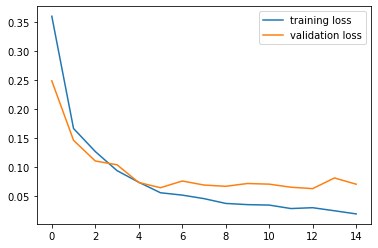

In [91]:
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
